In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("Banco de Dados Brain.xlsx")

In [ ]:
df.head(10) # verificando se foi importado corretamente

,Name,Update Order,Spool Diam,P1 - Separator Distance [mm],P5 - Force Generated by Wind [N],P6 - Spooling Force [N],P11 - Force Generated by Wind [N],P12 - Spooling Force [N],P18 - Force Generated by Wind [N],P19 - Spooling Force [N],...,P97 - Linearized Equivalent Stress 3 Membrane,P98 - Linearized Equivalent Stress 4 Membrane,P119 - Linearized Equivalent Stress Membrane,P120 - Linearized Equivalent Stress 2 Membrane,P121 - Linearized Equivalent Stress 3 Membrane,P122 - Linearized Equivalent Stress 4 Membrane,P151 - Linearized Equivalent Stress Membrane,P152 - Linearized Equivalent Stress 2 Membrane,P153 - Linearized Equivalent Stress 3 Membrane,P154 - Linearized Equivalent Stress 4 Membrane
0,Units,NaN,mm,mm,N,N,N,N,N,N,...,MPa,MPa,MPa,MPa,MPa,MPa,MPa,MPa,MPa,MPa
1,DP 0,1.0,1200,1,143759.923226,635092,143759.923226,635092,143759.923226,635092,...,10.466632,46.084026,35.015605,6.819117,10.466632,46.084026,27.956875,2.756645,8.882929,21.39149
2,DP 1,2.0,1200,1,143759.923226,635092,143759.923226,635092,143759.923226,635092,...,21.307679,73.495995,49.892732,9.491137,21.307679,73.495995,33.842755,3.74922,9.680527,20.215353
3,DP 2,3.0,1200,1,143759.923226,635092,143759.923226,635092,143759.923226,635092,...,32.2283,100.789337,64.706765,12.152437,32.2283,100.789337,37.060694,4.339159,10.853944,19.338582
4,DP 3,4.0,1200,1,143759.923226,635092,143759.923226,635092,143759.923226,635092,...,43.166411,127.832171,79.376109,14.803291,43.166411,127.832171,40.02423,4.964283,12.068444,18.853323
5,DP 4,5.0,1200,1,143759.923226,635092,143759.923226,635092,143759.923226,635092,...,54.289647,155.375082,94.264198,17.52548,54.289647,155.375082,34.515924,44.673466,12.228854,18.779457
6,DP 5,6.0,1200,1,143759.923226,635092,143759.923226,635092,143759.923226,635092,...,65.28175,182.662885,109.056973,20.208982,65.28175,182.662885,46.509725,6.31111,14.617208,19.044922
7,DP 6,7.0,1200,1,143759.923226,635092,143759.923226,635092,143759.923226,635092,...,76.276586,209.950587,123.850603,22.891171,76.276586,209.950587,49.706379,6.987215,15.943448,19.549721
8,DP 7,8.0,1200,1,143759.923226,635092,143759.923226,635092,143759.923226,635092,...,87.272618,237.23726,138.643149,25.570789,87.272618,237.23726,52.936157,7.695191,17.18308,20.428302
9,DP 8,9.0,1200,1,143759.923226,635092,143759.923226,635092,143759.923226,635092,...,98.269251,264.522601,153.434696,28.24761,98.269251,264.522601,56.156465,8.497499,18.098197,21.607197


In [ ]:
df = df.iloc[1 : , 2 :] # removendo unidades de medida (linha 1) e infromação da ordem da simulação (colunas 0 e 1)

In [ ]:
df.info() # verificando o tipo de dado reconhecido em cada coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 1 to 648
Data columns (total 67 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Spool Diam                                      648 non-null    object
 1   P1 - Separator Distance [mm]                    648 non-null    object
 2   P5 - Force Generated by Wind [N]                648 non-null    object
 3   P6 - Spooling Force [N]                         648 non-null    object
 4   P11 - Force Generated by Wind [N]               648 non-null    object
 5   P12 - Spooling Force [N]                        648 non-null    object
 6   P18 - Force Generated by Wind [N]               648 non-null    object
 7   P19 - Spooling Force [N]                        648 non-null    object
 8   P29 - Force Generated by Wind [N]               648 non-null    object
 9   P30 - Spooling Force [N]                        648 no

# **Colunas a serem mantidas**

1.   INPUTS diretos
>*Spool Diam* --> diametro da bobina (variavel categorica) <br>
>*P5 - Force Generated by Wind [N]* --> carga de vento aplicada no flange da bobina, sempre alinhado com a direção de aplicação da aceleração em roll (depende da área velica da bobina, pressão de vento e velocidade do vento - considerado constante de acordo com o tamanho da bobina) <br>
>*P47 - Product Mass* --> qtd de produto a ser transportado dado em tonelada metrica <br>
>*Massa linear da linha* --> auto explicativo <br>
>*P63 - accheave* --> aceleração na direção de heave <br>
>*P64 - accroll* --> aceleração na direção transversal <br>
>*P65 - accpitch* --> aceleração na direção longitudinal <br>
>*P66 - Spoolingf* --> identico a P6 <br>

2.   INPUTS baseados em outros valores
>*P6 - Spooling Force [N]* --> força lateral aplicadas nos flanges devido a qtd de linha carregada na bobina (calculo complexo, dependendo do diamentro da linha e da desnidade) <br>
>*P57 - ProductMassFlangeOrDrum X Component* --> Conservadorismo da análise, considerando que parte da carga do material que esta sendo transportado vá para os flanges, sendo aplicado na direção resultante entre o vetores de aceleração <br>
>*P60 - ProductMassFlangeOrDrum X Component* --> mesmo de p57

3. OUTPUT
>*P71 a P154* --> caso tenha algum valor **maior que 215** o arranjo não suporta as tensões

4. Criar nova coluna com Resultado no fim

In [ ]:
dados = df.copy() # criando uma cópia caso seja necessário reaver alguma informação

In [ ]:
colunas = [0, 2, 25, 43, 44, 45, 46, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66] # colunas a serem mantidas (input e output - vide texto acima)
dados = df.iloc[: ,colunas]
dados

,Spool Diam,P5 - Force Generated by Wind [N],P47 - Product Mass,P63 - accheave,P64 - accroll,P65 - accpitch,P66 - Spoolingf,P71 - Linearized Equivalent Stress Membrane,P72 - Linearized Equivalent Stress 2 Membrane,P73 - Linearized Equivalent Stress 3 Membrane,...,P97 - Linearized Equivalent Stress 3 Membrane,P98 - Linearized Equivalent Stress 4 Membrane,P119 - Linearized Equivalent Stress Membrane,P120 - Linearized Equivalent Stress 2 Membrane,P121 - Linearized Equivalent Stress 3 Membrane,P122 - Linearized Equivalent Stress 4 Membrane,P151 - Linearized Equivalent Stress Membrane,P152 - Linearized Equivalent Stress 2 Membrane,P153 - Linearized Equivalent Stress 3 Membrane,P154 - Linearized Equivalent Stress 4 Membrane
1,1200,143759.923226,200,0.9807,0.9807,0.9807,635092,27.733627,2.886677,10.895134,...,10.466632,46.084026,35.015605,6.819117,10.466632,46.084026,27.956875,2.756645,8.882929,21.39149
2,1200,143759.923226,200,0.9807,1.9614,1.9614,635092,34.118833,4.178052,16.178171,...,21.307679,73.495995,49.892732,9.491137,21.307679,73.495995,33.842755,3.74922,9.680527,20.215353
3,1200,143759.923226,200,0.9807,2.9421,2.9421,635092,40.909808,5.604866,22.356005,...,32.2283,100.789337,64.706765,12.152437,32.2283,100.789337,37.060694,4.339159,10.853944,19.338582
4,1200,143759.923226,200,0.9807,3.9228,3.9228,635092,48.000092,7.089518,28.701151,...,43.166411,127.832171,79.376109,14.803291,43.166411,127.832171,40.02423,4.964283,12.068444,18.853323
5,1200,143759.923226,200,0.9807,4.9035,4.9035,635092,55.465768,8.670671,34.903542,...,54.289647,155.375082,94.264198,17.52548,54.289647,155.375082,34.515924,44.673466,12.228854,18.779457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1200,143759.923226,250,17.6526,4.9035,4.9035,595773,152.244029,29.323494,155.932265,...,156.81543,159.982487,216.209149,38.209977,156.81543,159.982487,148.579477,28.556291,150.882505,139.257138
645,1200,143759.923226,250,17.6526,5.8842,5.8842,595773,157.379451,30.37145,158.789247,...,166.966563,198.651411,236.912354,42.015232,166.966563,198.651411,152.120622,29.271421,151.57504,140.764782
646,1200,143759.923226,250,17.6526,6.8649,6.8649,595773,162.772452,31.475215,161.996868,...,178.990014,239.470014,258.334288,46.052536,178.990014,239.470014,155.679642,29.991423,152.268591,142.263766
647,1200,143759.923226,250,17.6526,7.8456,7.8456,595773,168.408097,32.631355,165.53905,...,193.162907,279.81164,280.272967,50.292667,193.162907,279.81164,159.237361,30.71267,152.96545,143.765555


In [ ]:
dados = dados.apply(pd.to_numeric) # convertendo as colunas para valores numéricos
dados.info() # conferindo se foi convertido e se há valores não nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 1 to 648
Data columns (total 23 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Spool Diam                                      648 non-null    int64  
 1   P5 - Force Generated by Wind [N]                648 non-null    float64
 2   P47 - Product Mass                              648 non-null    int64  
 3   P63 - accheave                                  648 non-null    float64
 4   P64 - accroll                                   648 non-null    float64
 5   P65 - accpitch                                  648 non-null    float64
 6   P66 - Spoolingf                                 648 non-null    int64  
 7   P71 - Linearized Equivalent Stress Membrane     648 non-null    float64
 8   P72 - Linearized Equivalent Stress 2 Membrane   648 non-null    float64
 9   P73 - Linearized Equivalent Stress 3 Membra

In [ ]:
# considerando que se não há dados completos nas saídas, a simulação falhou portanto melhor eliminar a linha
dados = dados.dropna()
dados.info() # verificando se ainda há algum valor nulo

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 1 to 648
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Spool Diam                        643 non-null    int64  
 1   P5 - Force Generated by Wind [N]  643 non-null    float64
 2   P47 - Product Mass                643 non-null    int64  
 3   P63 - accheave                    643 non-null    float64
 4   P64 - accroll                     643 non-null    float64
 5   P65 - accpitch                    643 non-null    float64
 6   P66 - Spoolingf                   643 non-null    int64  
 7   Resultado                         643 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 45.2 KB


In [ ]:
# criando a coluna de resultados --> 215 é a maior carga que o equipamento suporta
dados["Resultado"] = np.where((dados["P71 - Linearized Equivalent Stress Membrane"] > 215) |
                            (dados["P72 - Linearized Equivalent Stress 2 Membrane"] > 215) |
                            (dados["P73 - Linearized Equivalent Stress 3 Membrane"] > 215) |
                            (dados["P74 - Linearized Equivalent Stress 4 Membrane"] > 215) |
                            (dados["P95 - Linearized Equivalent Stress Membrane"] > 215) |
                            (dados["P96 - Linearized Equivalent Stress 2 Membrane"] > 215) |
                            (dados["P98 - Linearized Equivalent Stress 4 Membrane"] > 215) |
                            (dados["P119 - Linearized Equivalent Stress Membrane"] > 215) |
                            (dados["P120 - Linearized Equivalent Stress 2 Membrane"] > 215) |
                            (dados["P121 - Linearized Equivalent Stress 3 Membrane"] > 215) |
                            (dados["P122 - Linearized Equivalent Stress 4 Membrane"] > 215) |
                            (dados["P151 - Linearized Equivalent Stress Membrane"] > 215) |
                            (dados["P152 - Linearized Equivalent Stress 2 Membrane"] > 215) |
                            (dados["P153 - Linearized Equivalent Stress 3 Membrane"] > 215) |
                            (dados["P154 - Linearized Equivalent Stress 4 Membrane"] > 215), 0, 1)

In [ ]:
dados["Resultado"].value_counts() #verificando se há aprovados e reprovados

1    506
0    137
Name: Resultado, dtype: int64

In [ ]:
dados.drop(dados.iloc[:, 7:23],axis = 1, inplace = True)

In [ ]:
dados.to_excel("output.xlsx") # salvando a planilha para modelo de IA

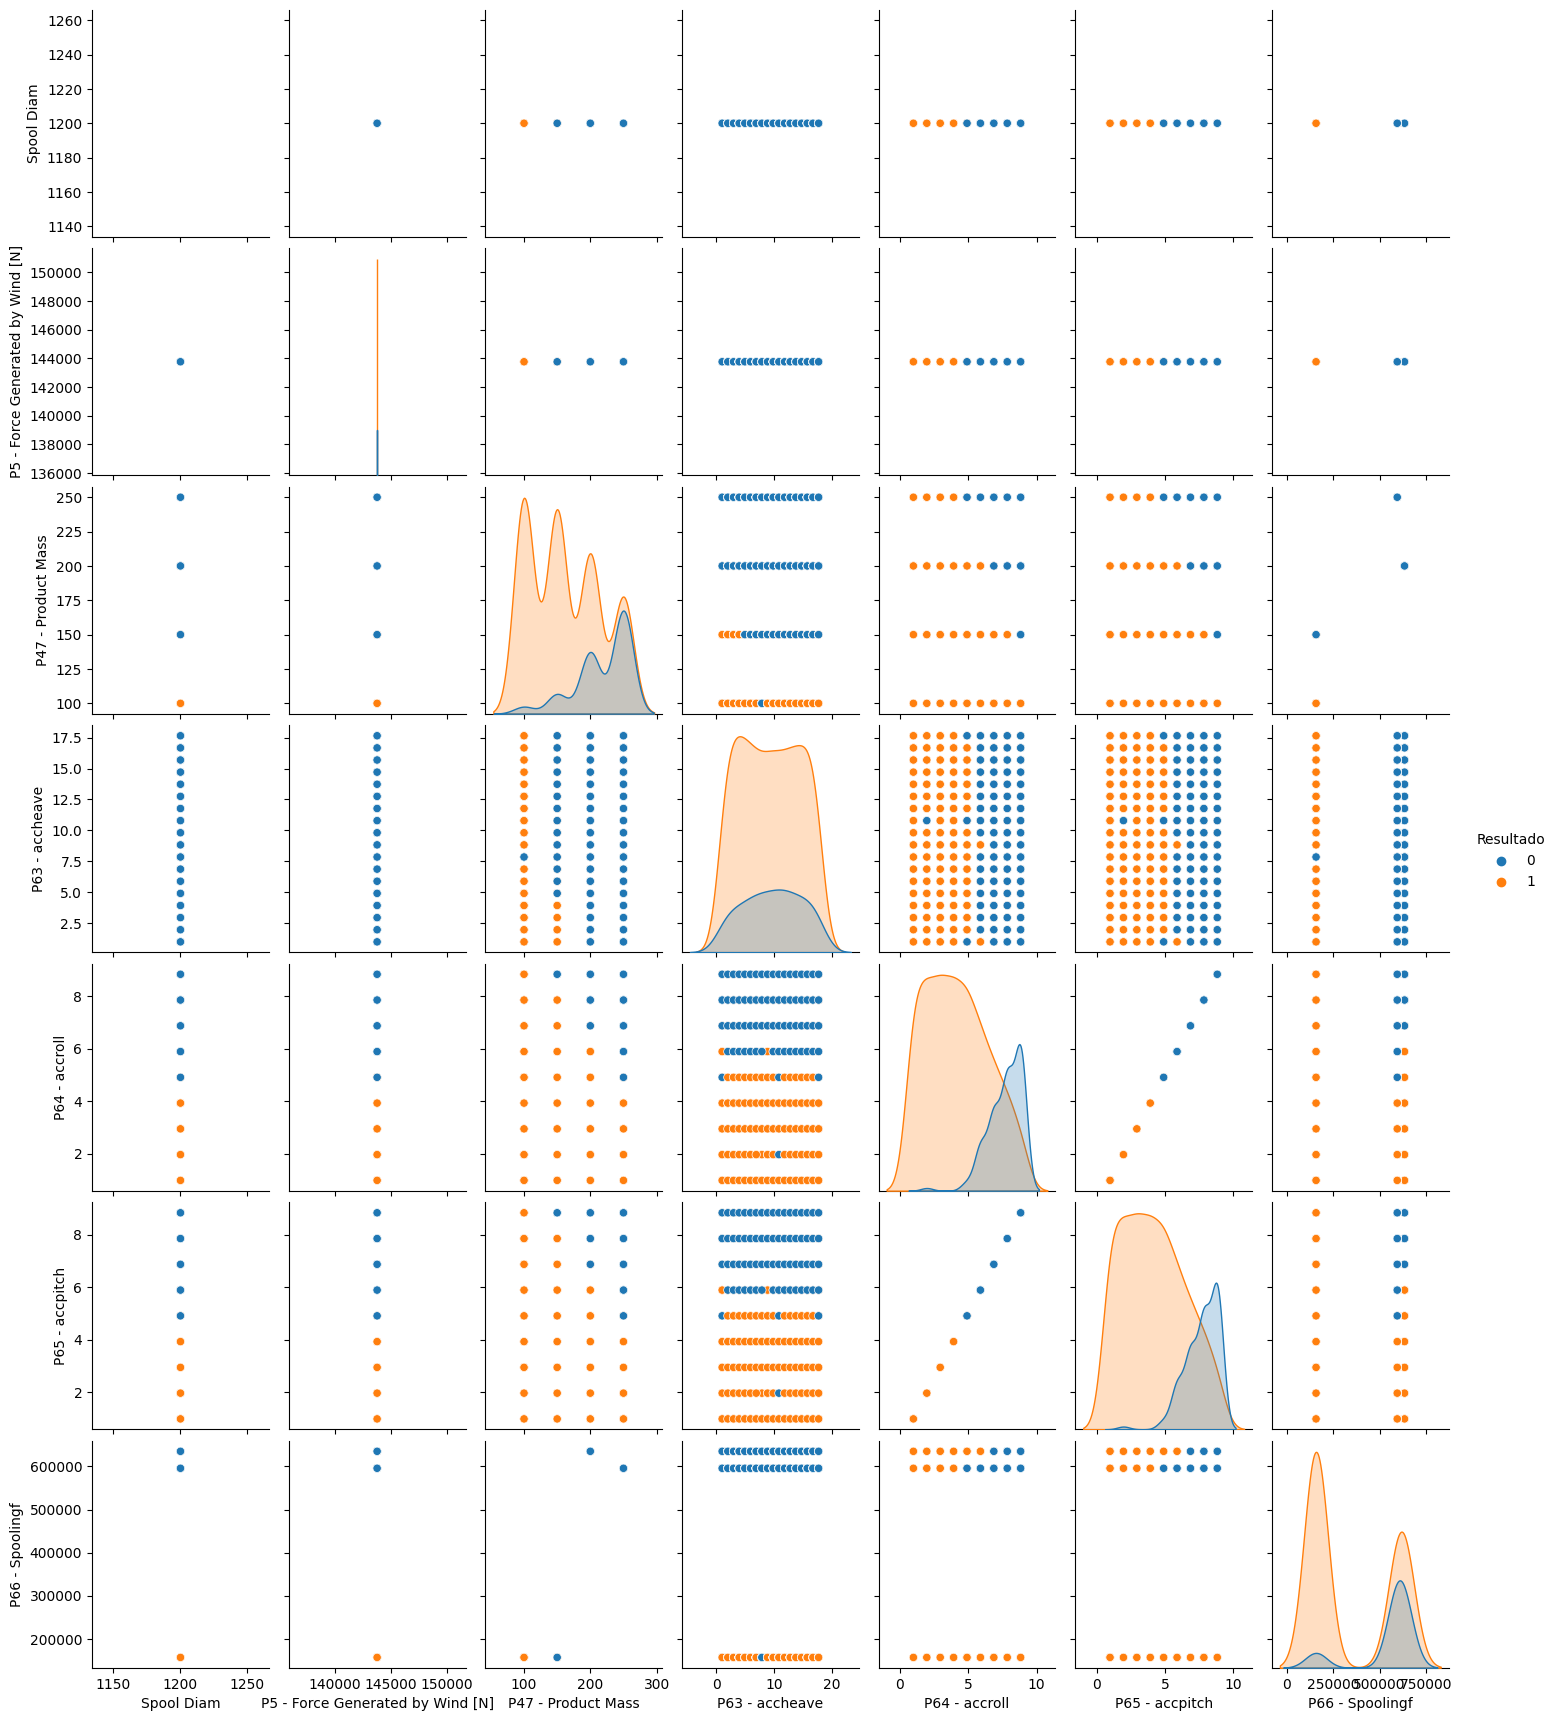

In [ ]:
sns.pairplot(dados, aspect=.85,hue="Resultado")

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:181: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  figlegend = self._figure.legend(handles, labels, **kwargs)


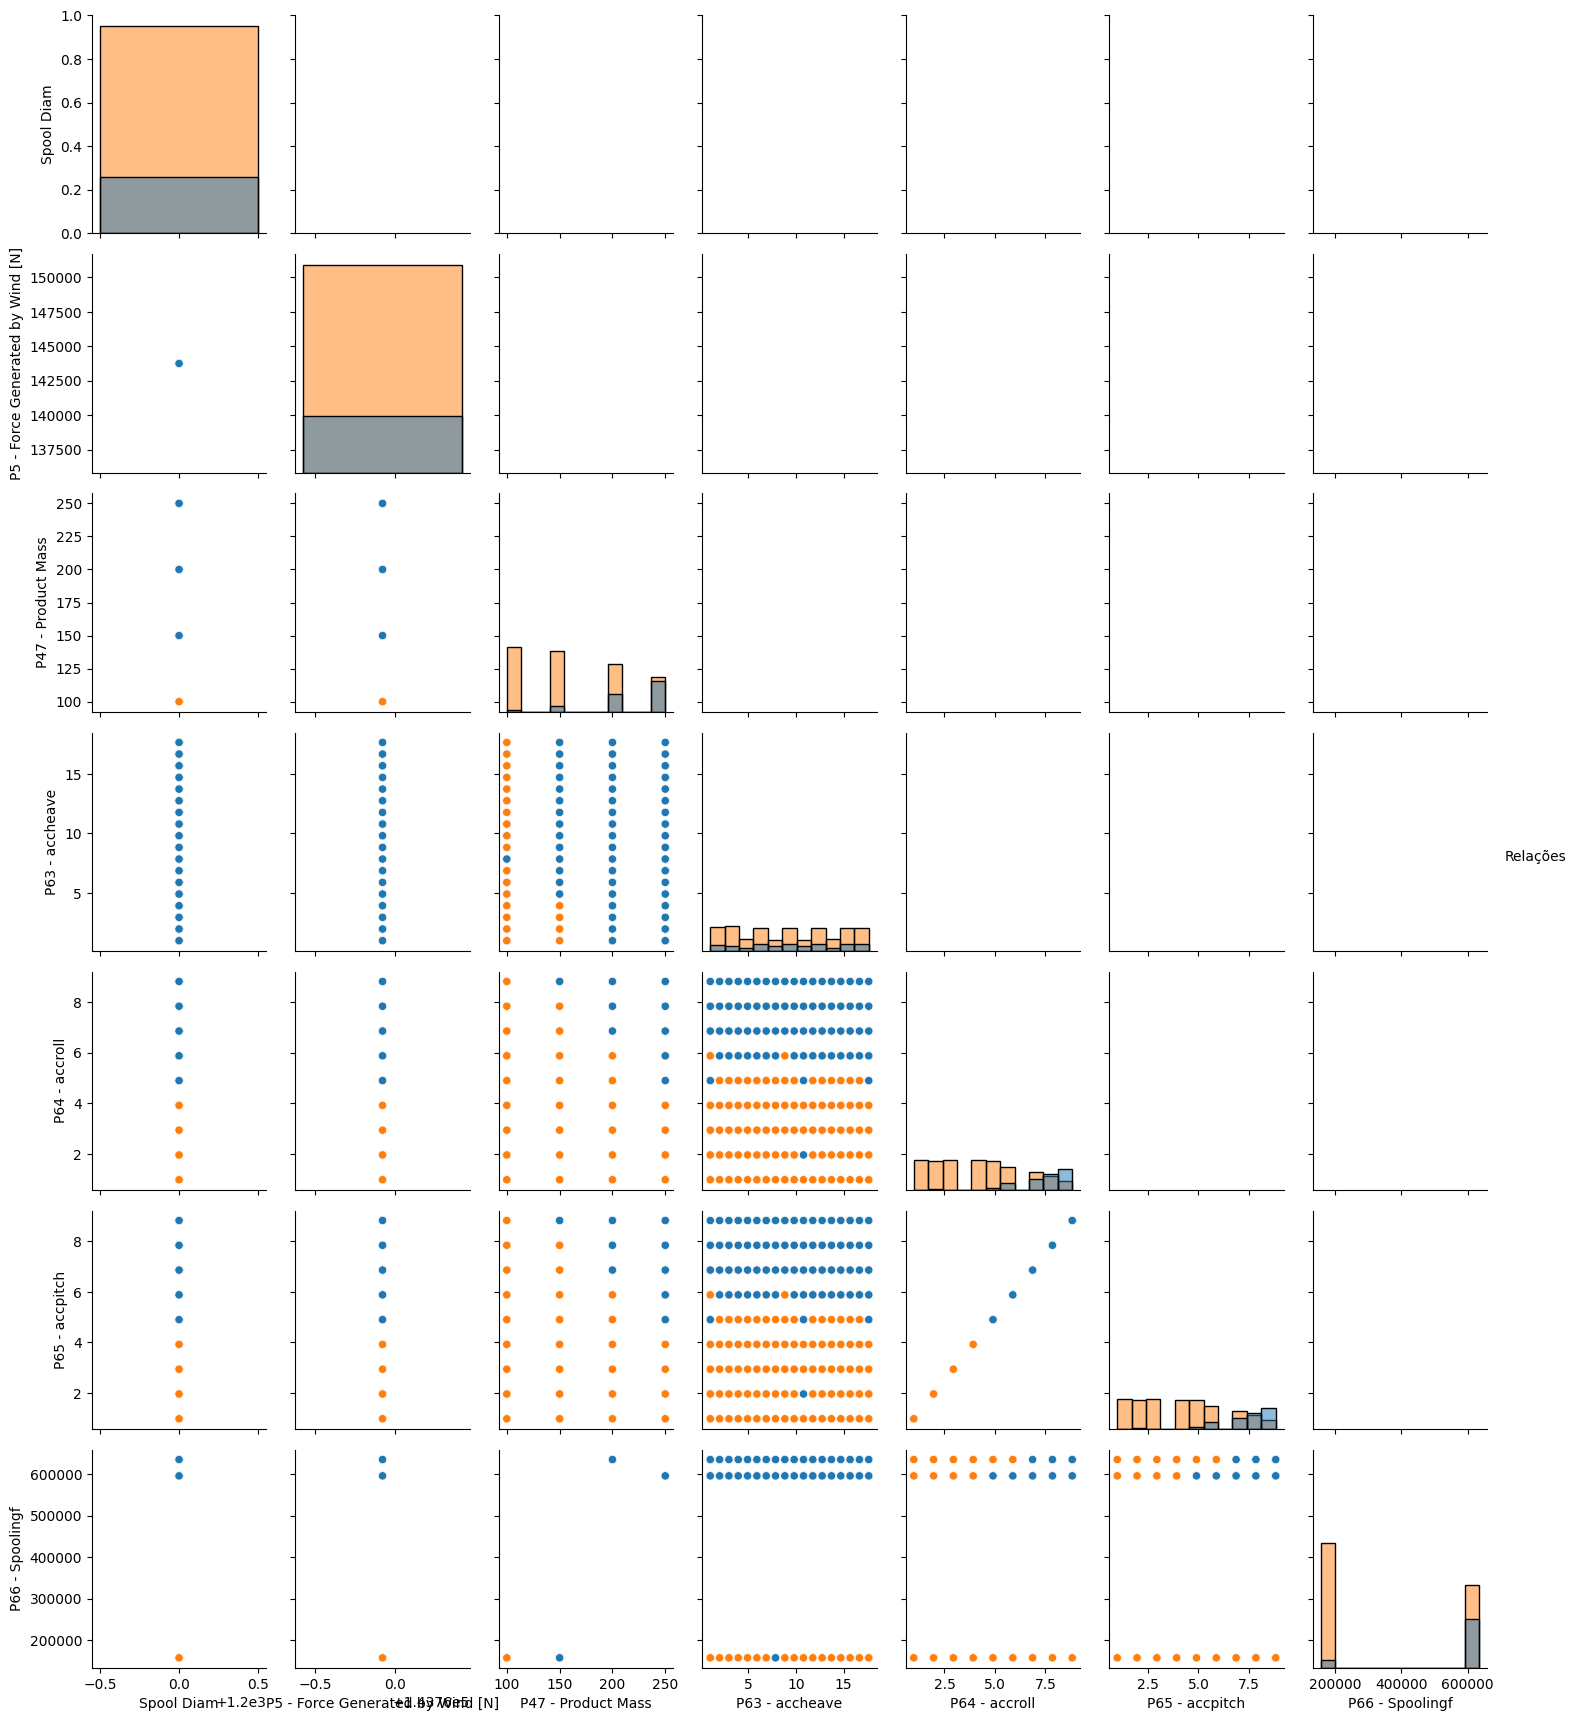

In [ ]:
g1 = sns.PairGrid(dados, aspect=.85,hue="Resultado")
#g1.map_upper(sns.scatterplot)
g1.map_diag(sns.histplot)
g1.map_lower(sns.scatterplot)

g1.add_legend(legend_data={0:"Reprovado", 1:"Aprovado"}, title="Relações")
plt.show() 

In [ ]:
for col in dados.columns:
  print(col)
  print("  Max = ", dados[col].max())
  print("  Min = ", dados[col].min())

Spool Diam
  Max =  1200
  Min =  1200
P5 - Force Generated by Wind [N]
  Max =  143759.923226444
  Min =  143759.923226444
P47 - Product Mass
  Max =  250
  Min =  100
P63 - accheave
  Max =  17.6526
  Min =  0.9807
P64 - accroll
  Max =  8.8263
  Min =  0.9807
P65 - accpitch
  Max =  8.8263
  Min =  0.9807
P66 - Spoolingf
  Max =  635092
  Min =  157325
Resultado
  Max =  Reprovado
  Min =  Aprovado


<ipython-input-115-7ce6b83fc4be>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(dados["Spool Diam"], kde=False, color="b")


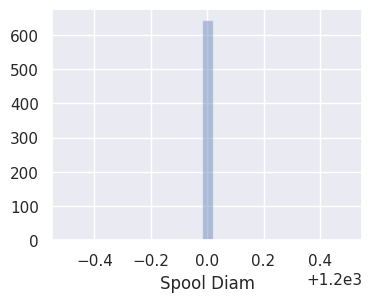

In [ ]:
plt.figure(figsize=(4,3))
sns.set(style="darkgrid")  
g = sns.distplot(dados["Spool Diam"], kde=False, color="b")
#g.set(xlim = (1000,1400))
plt.show() 

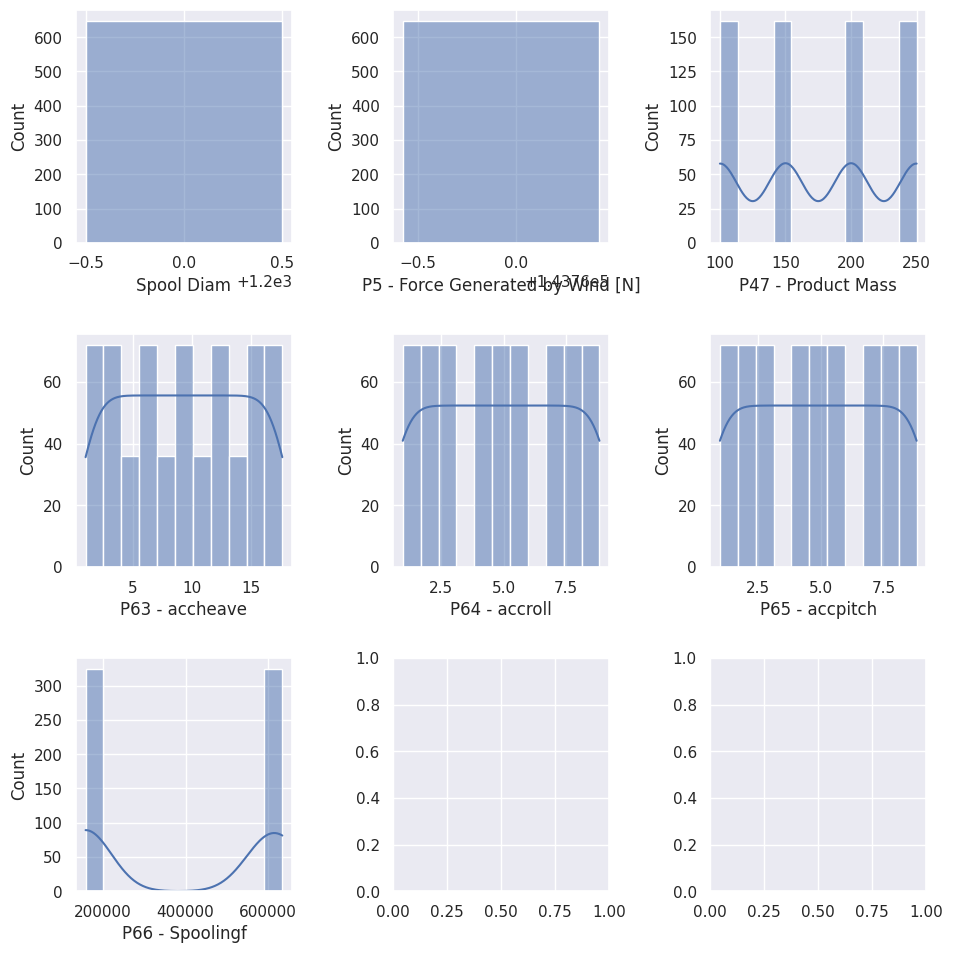

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
i=0

for col in dados.columns[0:7]:
    sns.histplot(df[col], ax=axes[ int(i/3), i % 3], kde=True)
    i += 1


fig.tight_layout(pad=2.0)

plt.show()

'\nsns.relplot(data=dados, x="P47 - Product Mass", y="P63 - accheave", hue="Resultado")\nplt.show()\nsns.relplot(data=dados, x="P47 - Product Mass", y="P64 - accroll", hue="Resultado")\nplt.show()\nsns.relplot(data=dados, x="P47 - Product Mass", y="P65 - accpitch", hue="Resultado")\nplt.show()\nsns.relplot(data=dados, x="P47 - Product Mass", y="P66 - Spoolingf", hue="Resultado")\nplt.show()\n'

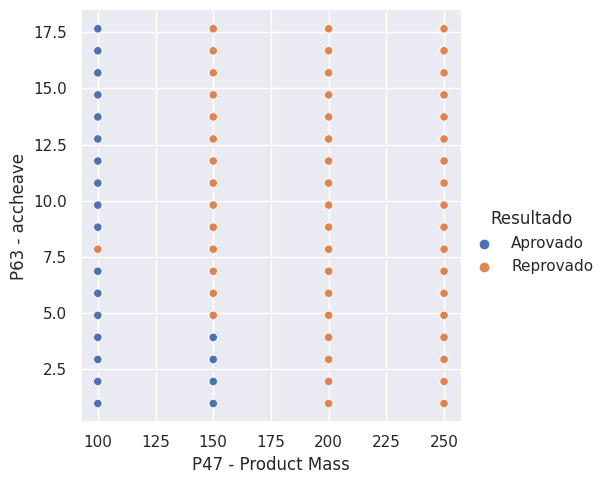

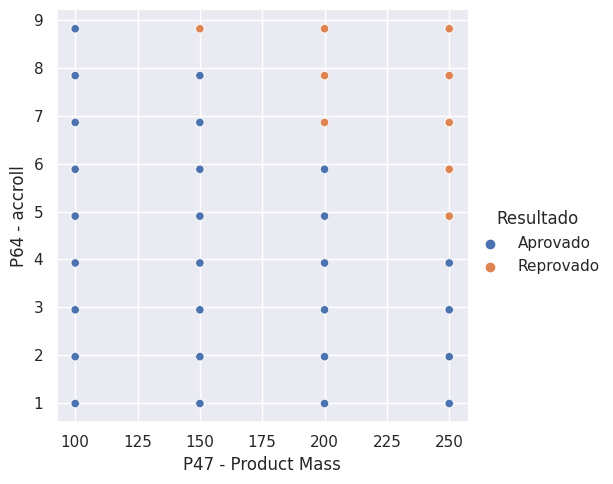

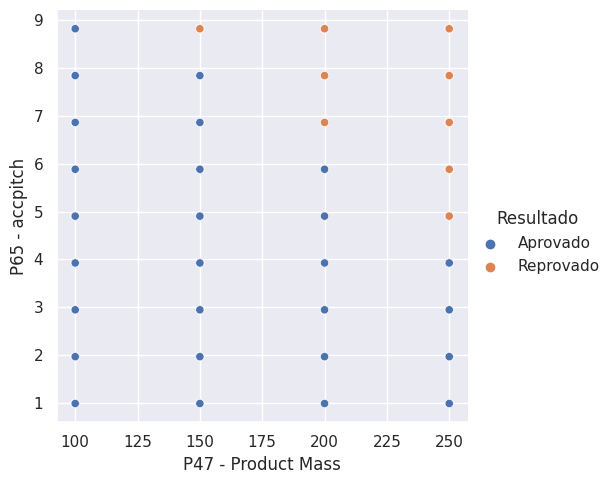

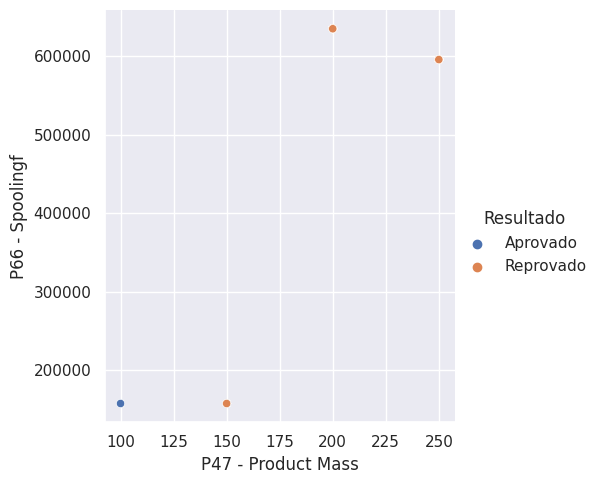

In [ ]:
"""
for col in dados.columns[1:7]:
  print(str(col))
  sns.relplot(data=dados, x="P47 - Product Mass", y=str(col), hue="Resultado"), ax=axes[ int(i/4),1])
  i += 1
"""

fig1 = sns.relplot(data=dados, x="P47 - Product Mass", y="P63 - accheave", hue="Resultado")
plt.savefig('01.png')
fig2 = sns.relplot(data=dados, x="P47 - Product Mass", y="P64 - accroll", hue="Resultado")
plt.savefig('02.png')
fig3 = sns.relplot(data=dados, x="P47 - Product Mass", y="P65 - accpitch", hue="Resultado")
plt.savefig('03.png')
fig4 = sns.relplot(data=dados, x="P47 - Product Mass", y="P66 - Spoolingf", hue="Resultado")
plt.savefig('04.png')

"""
sns.relplot(data=dados, x="P47 - Product Mass", y="P63 - accheave", hue="Resultado")
plt.show()
sns.relplot(data=dados, x="P47 - Product Mass", y="P64 - accroll", hue="Resultado")
plt.show()
sns.relplot(data=dados, x="P47 - Product Mass", y="P65 - accpitch", hue="Resultado")
plt.show()
sns.relplot(data=dados, x="P47 - Product Mass", y="P66 - Spoolingf", hue="Resultado")
plt.show()
"""